<a href="https://colab.research.google.com/github/devyulbae/AIClass/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

* 주어진 데이터를 기반으로 예측값을 찾아보자


In [1]:
import tensorflow as tf # !pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

## Hypothesis

* 우리가 세운 가설을 코드로 만들어봅시다.

$$ H(x) = Wx + b $$

* 예측해야되는 데이터는 주어집니다.

tf.Tensor([1.2 1.9 2.6 3.3 4. ], shape=(5,), dtype=float32)


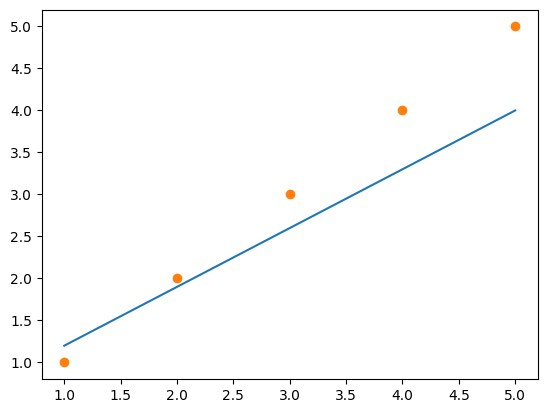

In [2]:
# 주어진 데이터를 확인해 봅시다.
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

#이 데이터를 표현하는 모델을 정의해봅시다.
W = tf.Variable(0.7) # 임의의 값
b = tf.Variable(0.5) # 임의의 값

# Hpyothesis 가설
hypothesis = W * x_data + b
print(hypothesis)

# 표로 출력
plt.plot(x_data, hypothesis.numpy())
plt.plot(x_data, y_data, 'o')
plt.show()

## Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

In [3]:
# Cost function == Loss Function
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
tf.print(tf.square(hypothesis - y_data))
tf.print(cost)

sq = tf.square(3) # 제곱을 해주는 함수
tf.print(sq)


[0.0400000177 0.0100000044 0.160000071 0.490000069 1]
0.340000033
9


# Cost Function을 조금 더 쉽게 표현해봅시다.
## Simplifed hypothesis

$$ H(x) = Wx $$

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

* b 를 W 행렬에 포함 시킬 수 있기 때문에 생략이 가능하다
* Cost 함수를 정의해보자

* 차원을 축소시켜서 생각해 볼 수 있다.


In [4]:
def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

## 우리가 가정한 Cost Funtion을 살펴보자

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

W = -1, cost(W) = 18.67
$$ cost(W)=\frac { 1 }{ 3 } ( (-1 * 1 - 1)^2 + (-1 * 2 - 2)^2 + (-1 * 3 - 3)^2) $$

W = 0, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (0 * 1 - 1)^2 + (0 * 2 - 2)^2 + (0 * 3 - 3)^2) $$

W = 1, cost(W) = 0
$$ cost(W)=\frac { 1 }{ 3 } ( (1 * 1 - 1)^2 + (1 * 2 - 2)^2 + (1 * 3 - 3)^2) $$

W = 2, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (2 * 1 - 1)^2 + (2 * 2 - 2)^2 + (2 * 3 - 3)^2) $$


-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


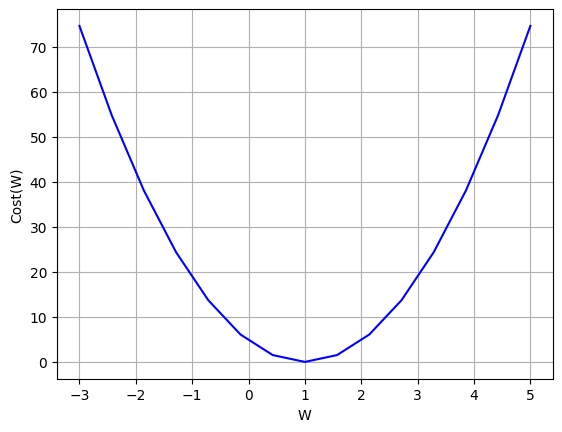

In [5]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

W_values = np.linspace(-3, 5, num=15) # -3 ~ 5 사이의 15개 숫자들 - 15등분
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

# Cost Function을 시각화 해보자

plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.grid(True)
plt.show()

# Cost Function을 이용해서 최적 값은 어떻게 찾는것일까?

## Minimizing Cost == Gradient descent

$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

$$ W:=W-\alpha \frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } }) } x_{ i }  $$

$$ \alpha = Learning Rate $$

In [ ]:
W = tf.Variable([4.1]) # 임의의 값

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Gradient Descent의 동작 원리
    lr = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(lr, gradient)
    W.assign(descent)

    if step % 10 == 0:
        print("step : {:3}, cost :  {:5.4f}, W : {:5.6f}".format(step, cost.numpy(), W.numpy()[0]))


step :   0, cost :  44.8467, W : 3.955333
step :  10, cost :  17.2435, W : 2.832543
step :  20, cost :  6.6301, W : 2.136324
step :  30, cost :  2.5493, W : 1.704612
step :  40, cost :  0.9802, W : 1.436916
step :  50, cost :  0.3769, W : 1.270923
step :  60, cost :  0.1449, W : 1.167994
step :  70, cost :  0.0557, W : 1.104170
step :  80, cost :  0.0214, W : 1.064594
step :  90, cost :  0.0082, W : 1.040053
step : 100, cost :  0.0032, W : 1.024836
step : 110, cost :  0.0012, W : 1.015400
step : 120, cost :  0.0005, W : 1.009549
step : 130, cost :  0.0002, W : 1.005921
step : 140, cost :  0.0001, W : 1.003672
step : 150, cost :  0.0000, W : 1.002277
step : 160, cost :  0.0000, W : 1.001412
step : 170, cost :  0.0000, W : 1.000875
step : 180, cost :  0.0000, W : 1.000543
step : 190, cost :  0.0000, W : 1.000337
step : 200, cost :  0.0000, W : 1.000208
step : 210, cost :  0.0000, W : 1.000129
step : 220, cost :  0.0000, W : 1.000080
step : 230, cost :  0.0000, W : 1.000050
step : 240, co

# 다시 돌아와서 가설과 Cost Function을 이용해 계산해봅시다.
## GradientTape()
* 위에서는 직접 가중치의 업데이트를 진행
* TF에서 지원하는 함수로 업데이트할 가중치를 계산해 주는 역할
* Cost 함수와 예측 값으로 가중치를 얼마나 업데이트할지 결정해준다.

In [ ]:
W = tf.Variable(3.7) # 임의의 값
b = tf.Variable(1.5) # 임의의 값

with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])

print(W_grad, b_grad)


tf.Tensor(68.4, shape=(), dtype=float32) tf.Tensor(19.2, shape=(), dtype=float32)


## assign_sub()

* A = A - B
* A -= B
* 위의 계산을 해주는 함수

* 가중치 값을 업데이트

In [ ]:
learning_rate = 0.01

print(learning_rate * W_grad)
print(learning_rate * b_grad)

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

tf.Tensor(0.684, shape=(), dtype=float32)
tf.Tensor(0.192, shape=(), dtype=float32)


(3.016, 1.308)

### 여러번 돌려봅시다.

    0|W :     2.4940| b :     1.1609| loss :  62.239246


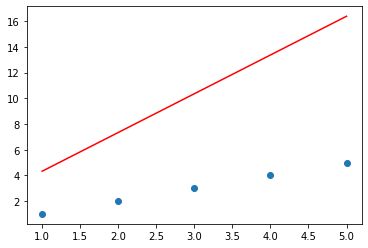

   10|W :     0.9275| b :     0.7021| loss :   0.363163


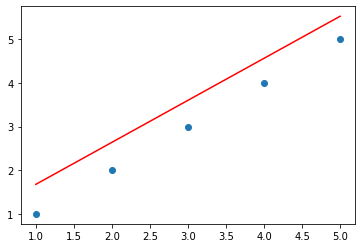

   20|W :     0.8280| b :     0.6505| loss :   0.078311


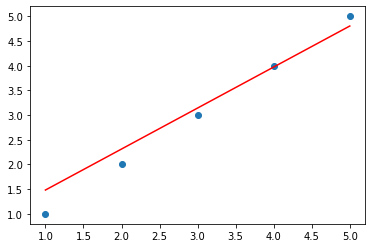

   30|W :     0.8269| b :     0.6269| loss :   0.072003


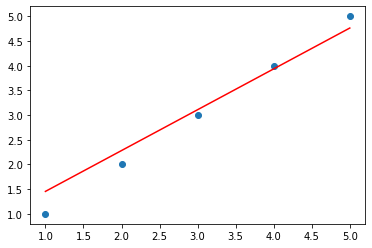

   40|W :     0.8322| b :     0.6059| loss :   0.067282


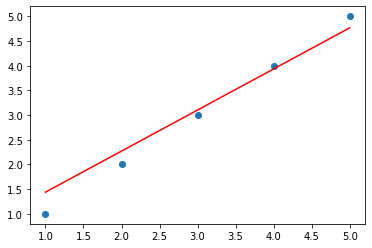

   50|W :     0.8378| b :     0.5858| loss :   0.062876


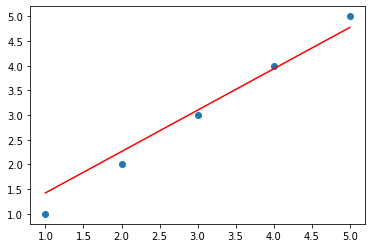

   60|W :     0.8432| b :     0.5662| loss :   0.058758


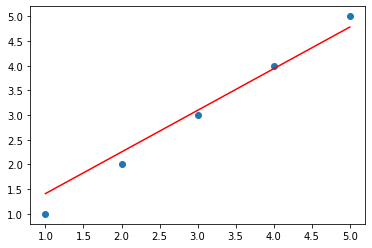

   70|W :     0.8484| b :     0.5474| loss :   0.054910


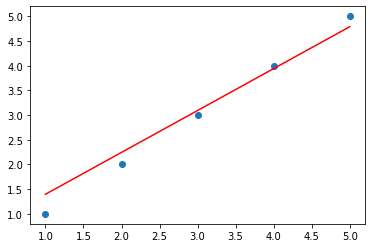

   80|W :     0.8534| b :     0.5292| loss :   0.051314


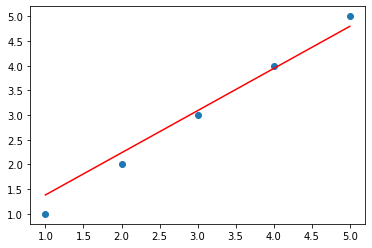

   90|W :     0.8583| b :     0.5115| loss :   0.047953


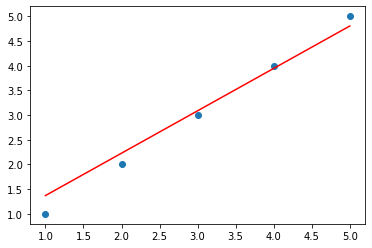

  100|W :     0.8630| b :     0.4945| loss :   0.044813


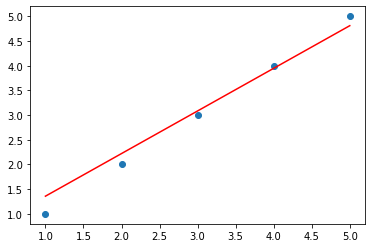

  110|W :     0.8676| b :     0.4780| loss :   0.041878


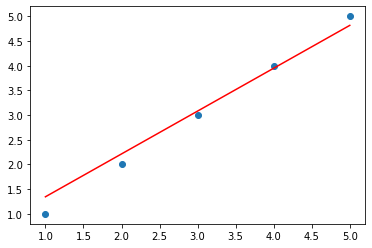

  120|W :     0.8720| b :     0.4621| loss :   0.039135


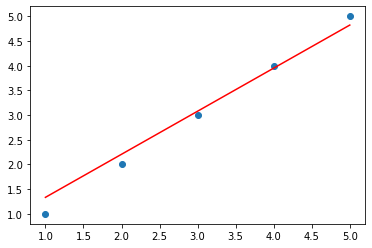

  130|W :     0.8763| b :     0.4467| loss :   0.036572


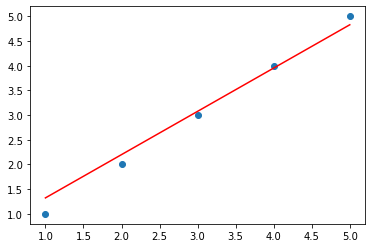

  140|W :     0.8804| b :     0.4319| loss :   0.034177


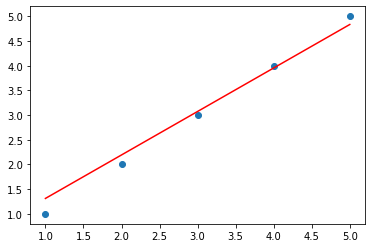

  150|W :     0.8844| b :     0.4175| loss :   0.031939


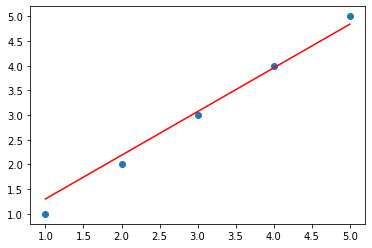

  160|W :     0.8882| b :     0.4036| loss :   0.029847


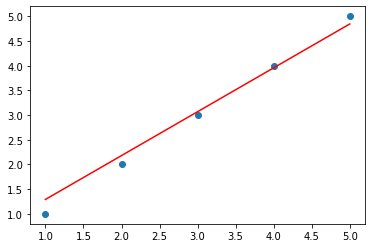

  170|W :     0.8919| b :     0.3901| loss :   0.027893


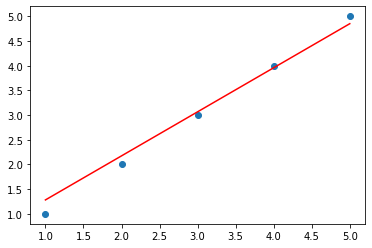

  180|W :     0.8955| b :     0.3771| loss :   0.026066


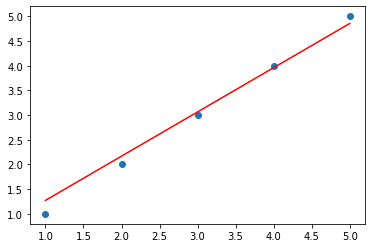

  190|W :     0.8990| b :     0.3646| loss :   0.024359


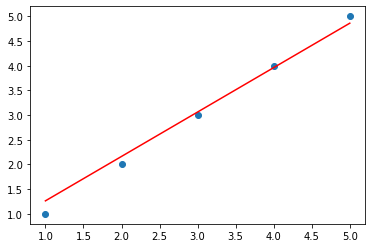

  200|W :     0.9024| b :     0.3524| loss :   0.022764


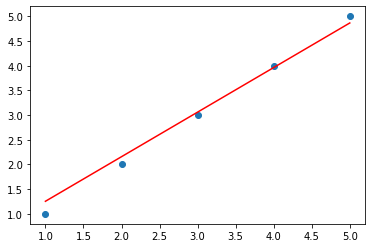

  210|W :     0.9056| b :     0.3407| loss :   0.021273


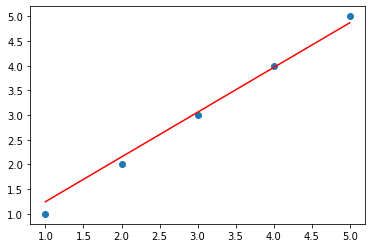

  220|W :     0.9088| b :     0.3294| loss :   0.019880


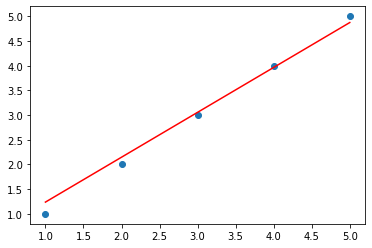

  230|W :     0.9118| b :     0.3184| loss :   0.018578


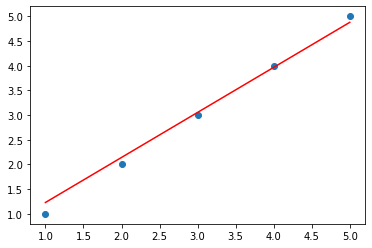

  240|W :     0.9147| b :     0.3078| loss :   0.017361


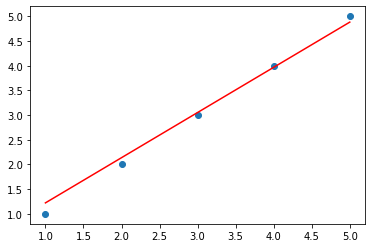

  250|W :     0.9176| b :     0.2975| loss :   0.016224


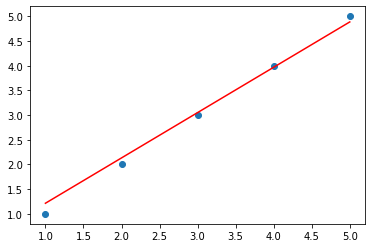

  260|W :     0.9203| b :     0.2876| loss :   0.015161


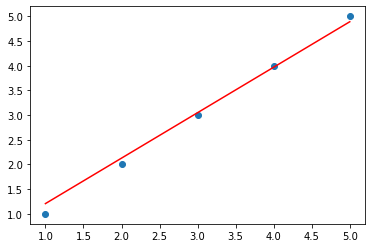

  270|W :     0.9230| b :     0.2781| loss :   0.014169


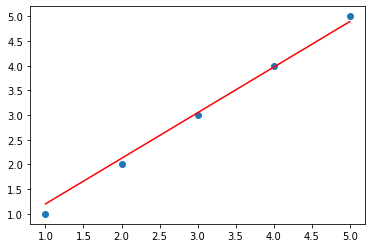

  280|W :     0.9255| b :     0.2688| loss :   0.013241


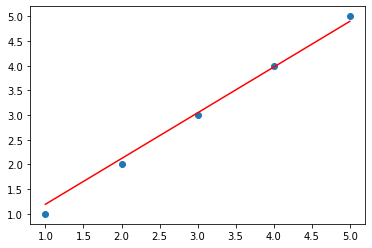

  290|W :     0.9280| b :     0.2598| loss :   0.012373


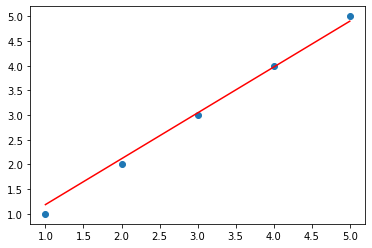

  300|W :     0.9304| b :     0.2512| loss :   0.011563


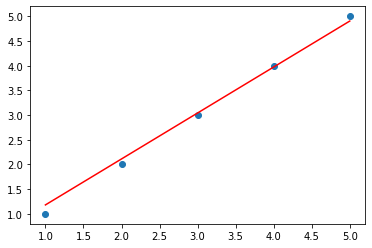

  310|W :     0.9327| b :     0.2428| loss :   0.010806


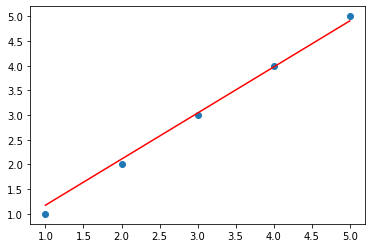

  320|W :     0.9350| b :     0.2347| loss :   0.010098


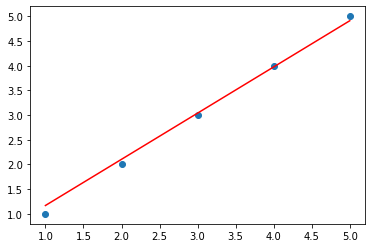

  330|W :     0.9371| b :     0.2269| loss :   0.009437


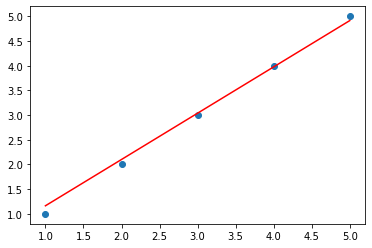

  340|W :     0.9392| b :     0.2194| loss :   0.008819


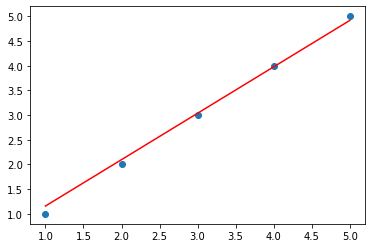

  350|W :     0.9413| b :     0.2121| loss :   0.008241


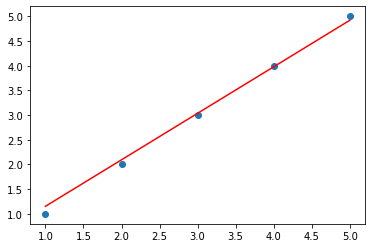

  360|W :     0.9432| b :     0.2050| loss :   0.007702


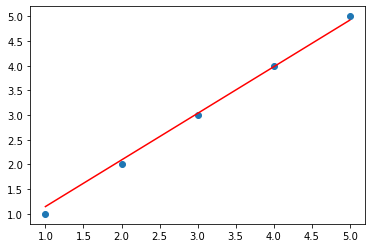

  370|W :     0.9451| b :     0.1982| loss :   0.007197


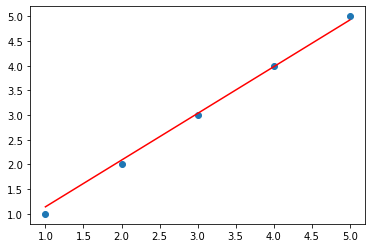

  380|W :     0.9469| b :     0.1916| loss :   0.006726


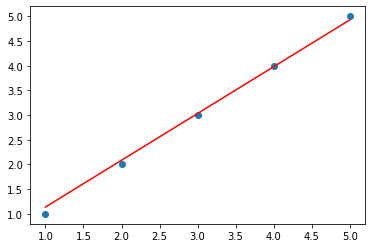

  390|W :     0.9487| b :     0.1852| loss :   0.006285


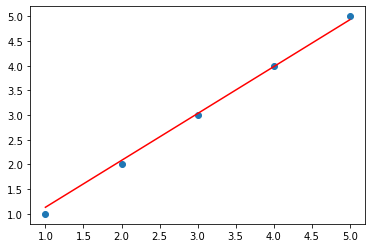

  400|W :     0.9504| b :     0.1790| loss :   0.005874


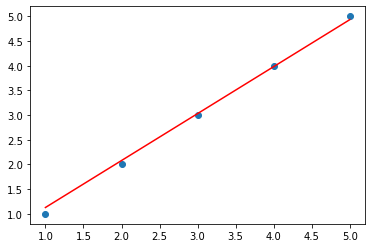

  410|W :     0.9521| b :     0.1731| loss :   0.005489


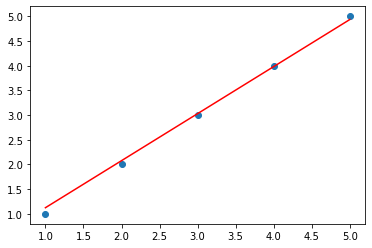

  420|W :     0.9537| b :     0.1673| loss :   0.005130


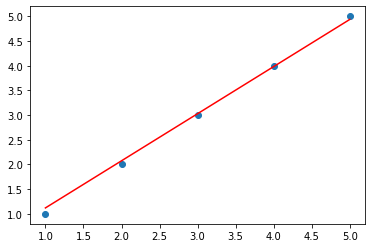

  430|W :     0.9552| b :     0.1617| loss :   0.004794


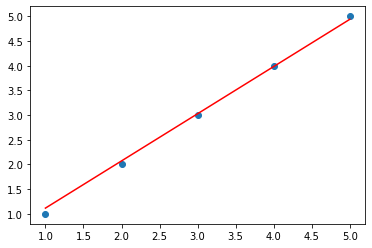

  440|W :     0.9567| b :     0.1563| loss :   0.004480


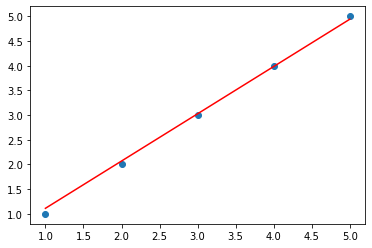

  450|W :     0.9581| b :     0.1511| loss :   0.004186


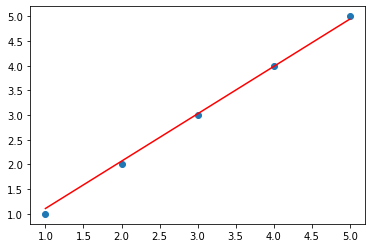

  460|W :     0.9595| b :     0.1461| loss :   0.003912


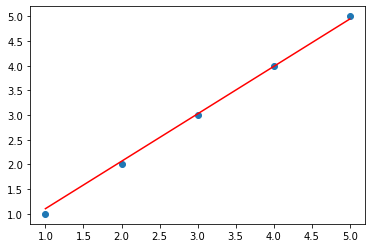

  470|W :     0.9609| b :     0.1412| loss :   0.003656


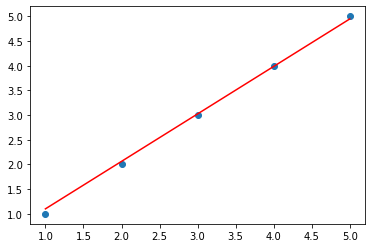

  480|W :     0.9622| b :     0.1365| loss :   0.003416


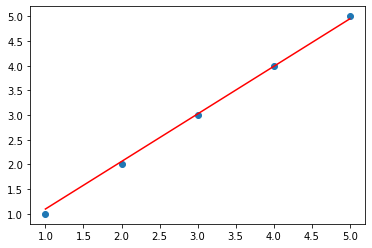

  490|W :     0.9634| b :     0.1320| loss :   0.003193


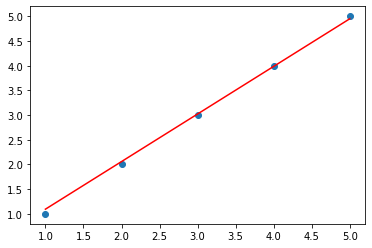

  500|W :     0.9647| b :     0.1276| loss :   0.002984


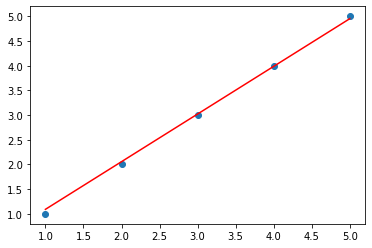

  510|W :     0.9658| b :     0.1233| loss :   0.002788


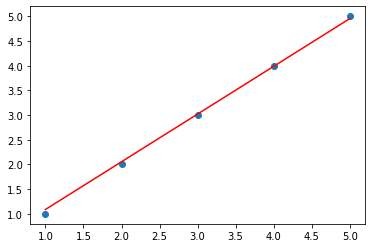

  520|W :     0.9670| b :     0.1192| loss :   0.002606


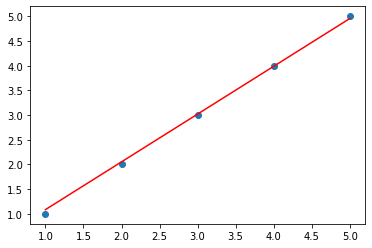

  530|W :     0.9681| b :     0.1153| loss :   0.002435


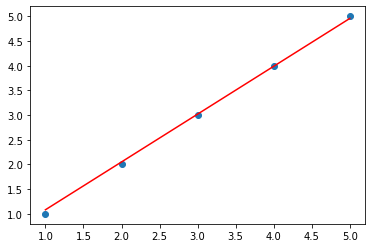

  540|W :     0.9691| b :     0.1114| loss :   0.002276


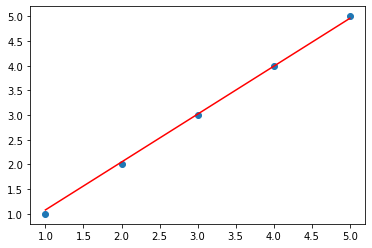

  550|W :     0.9702| b :     0.1077| loss :   0.002126


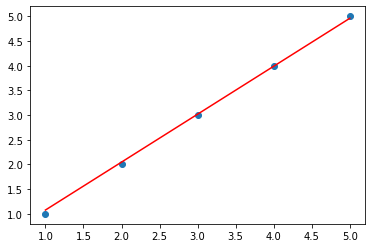

  560|W :     0.9712| b :     0.1041| loss :   0.001987


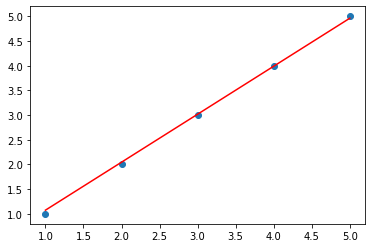

  570|W :     0.9721| b :     0.1007| loss :   0.001857


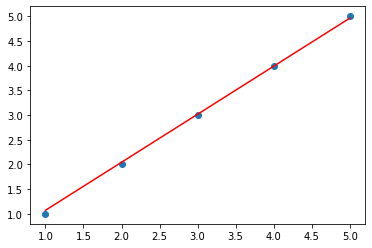

  580|W :     0.9730| b :     0.0973| loss :   0.001735


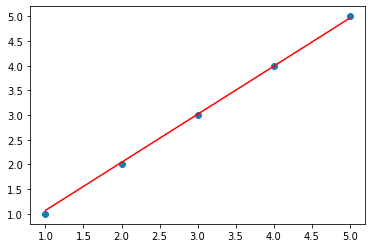

  590|W :     0.9739| b :     0.0941| loss :   0.001622


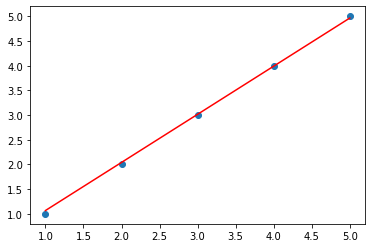

  600|W :     0.9748| b :     0.0909| loss :   0.001516


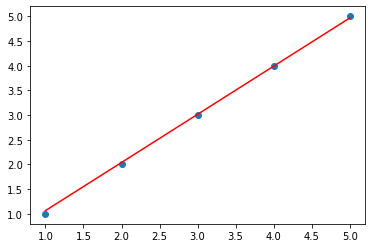

  610|W :     0.9756| b :     0.0879| loss :   0.001416


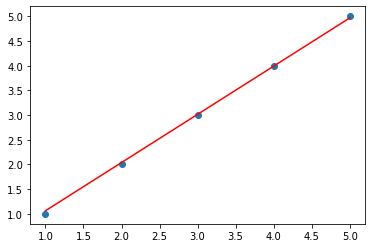

  620|W :     0.9765| b :     0.0850| loss :   0.001324


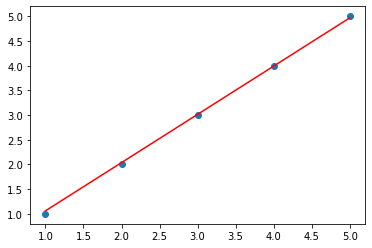

  630|W :     0.9772| b :     0.0822| loss :   0.001237


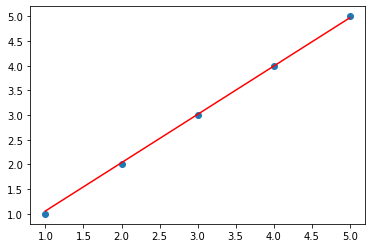

  640|W :     0.9780| b :     0.0794| loss :   0.001156


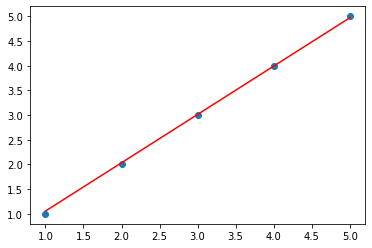

  650|W :     0.9787| b :     0.0768| loss :   0.001080


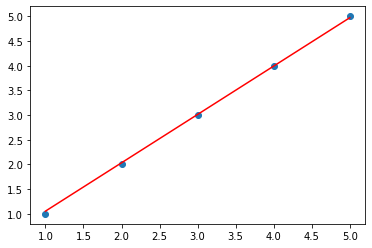

  660|W :     0.9794| b :     0.0742| loss :   0.001009


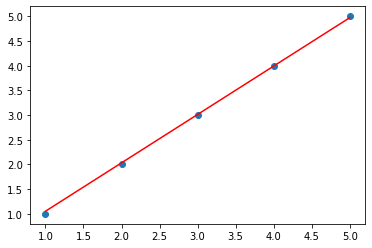

  670|W :     0.9801| b :     0.0717| loss :   0.000943


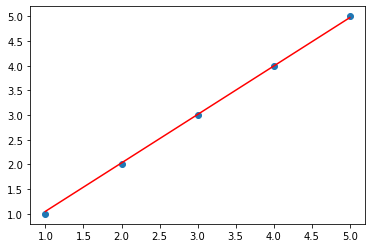

  680|W :     0.9808| b :     0.0694| loss :   0.000882


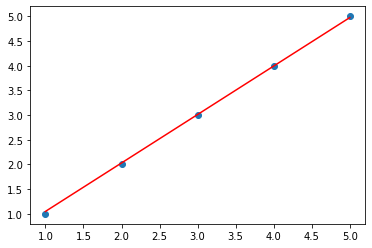

  690|W :     0.9814| b :     0.0670| loss :   0.000824


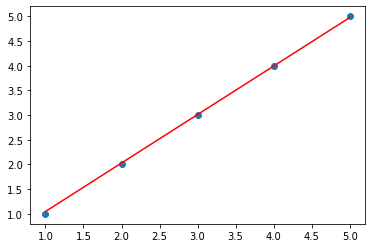

  700|W :     0.9820| b :     0.0648| loss :   0.000770


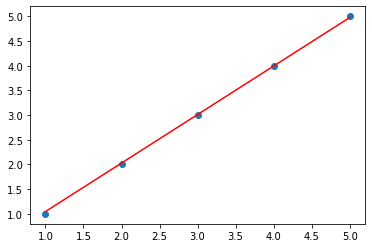

  710|W :     0.9826| b :     0.0627| loss :   0.000719


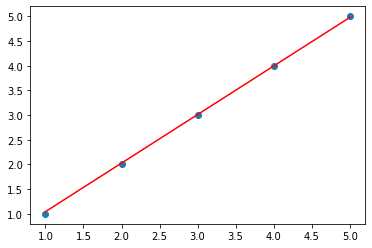

  720|W :     0.9832| b :     0.0606| loss :   0.000672


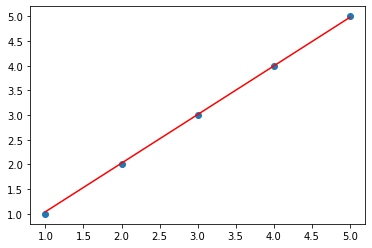

  730|W :     0.9838| b :     0.0586| loss :   0.000628


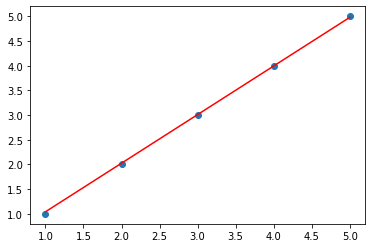

  740|W :     0.9843| b :     0.0566| loss :   0.000587


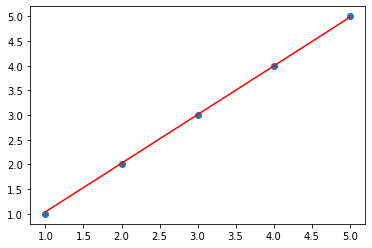

  750|W :     0.9848| b :     0.0547| loss :   0.000549


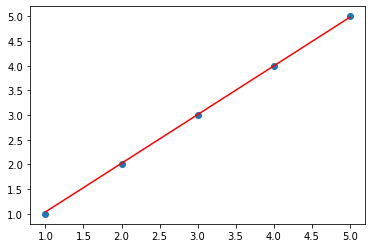

  760|W :     0.9853| b :     0.0529| loss :   0.000513


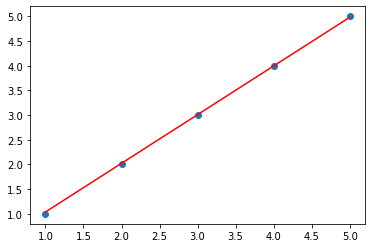

  770|W :     0.9858| b :     0.0511| loss :   0.000479


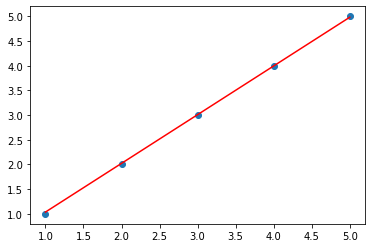

  780|W :     0.9863| b :     0.0494| loss :   0.000448


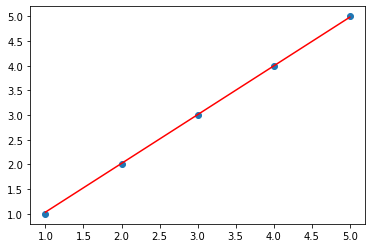

  790|W :     0.9868| b :     0.0478| loss :   0.000418


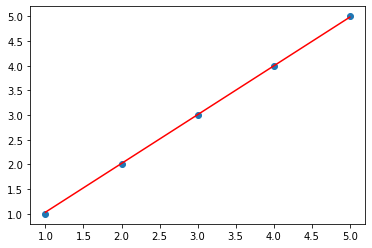

  800|W :     0.9872| b :     0.0462| loss :   0.000391


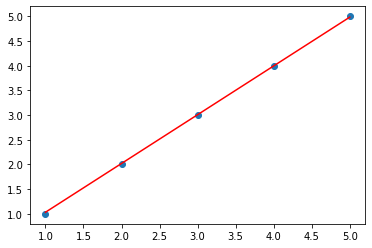

  810|W :     0.9876| b :     0.0447| loss :   0.000365


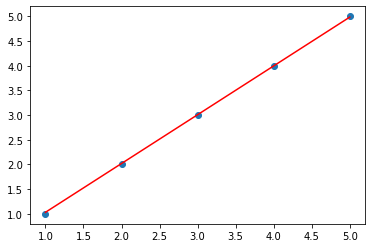

  820|W :     0.9880| b :     0.0432| loss :   0.000342


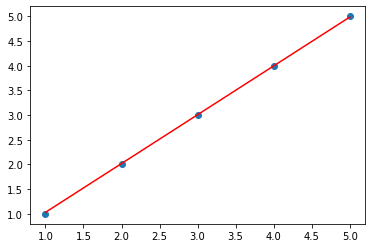

  830|W :     0.9884| b :     0.0417| loss :   0.000319


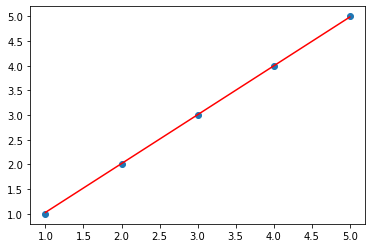

  840|W :     0.9888| b :     0.0403| loss :   0.000298


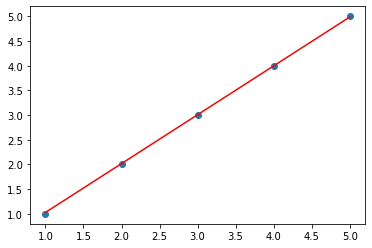

  850|W :     0.9892| b :     0.0390| loss :   0.000279


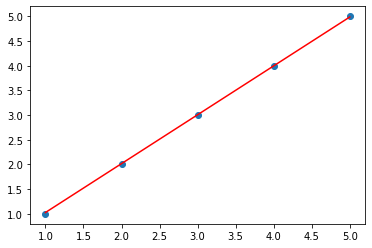

  860|W :     0.9896| b :     0.0377| loss :   0.000260


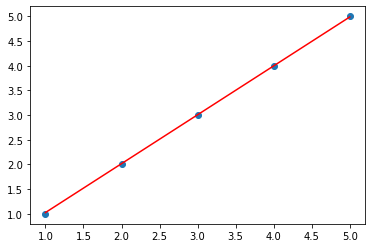

  870|W :     0.9899| b :     0.0364| loss :   0.000243


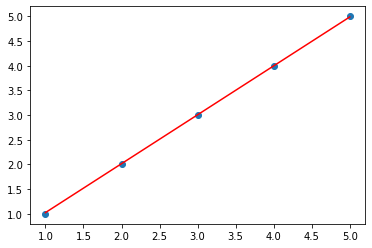

  880|W :     0.9902| b :     0.0352| loss :   0.000227


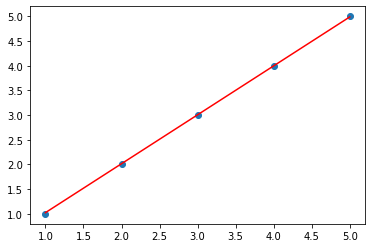

  890|W :     0.9906| b :     0.0341| loss :   0.000213


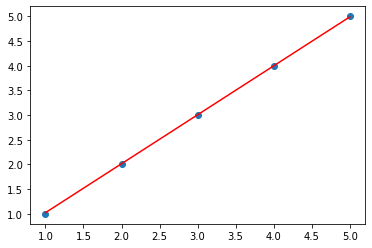

  900|W :     0.9909| b :     0.0329| loss :   0.000199


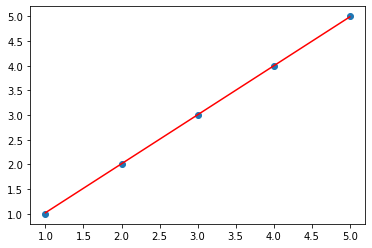

  910|W :     0.9912| b :     0.0318| loss :   0.000186


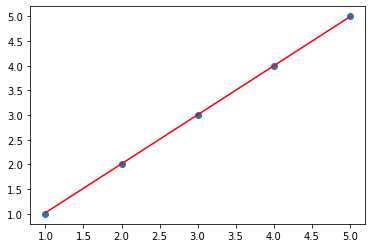

  920|W :     0.9915| b :     0.0308| loss :   0.000173


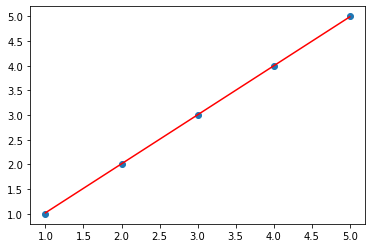

  930|W :     0.9918| b :     0.0297| loss :   0.000162


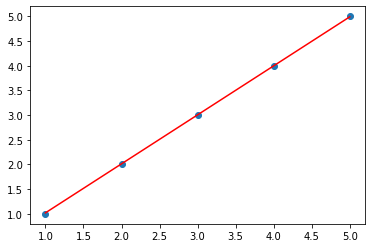

  940|W :     0.9920| b :     0.0288| loss :   0.000152


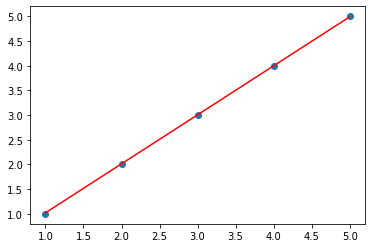

  950|W :     0.9923| b :     0.0278| loss :   0.000142


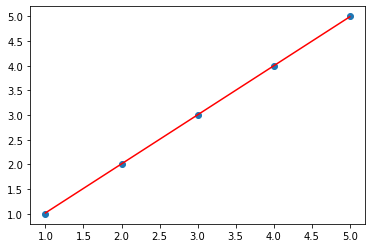

  960|W :     0.9926| b :     0.0269| loss :   0.000132


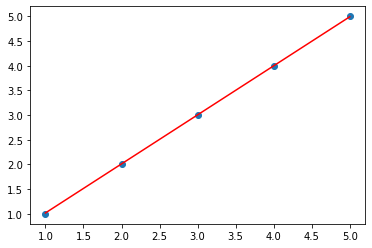

  970|W :     0.9928| b :     0.0260| loss :   0.000124


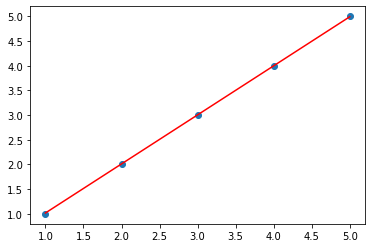

  980|W :     0.9930| b :     0.0251| loss :   0.000116


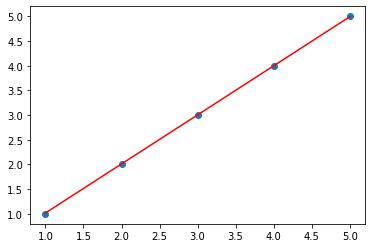

  990|W :     0.9933| b :     0.0243| loss :   0.000108


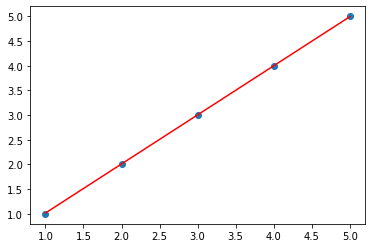

In [ ]:
for i in range(1000):
    with tf.GradientTape() as tape:
        #가설 설정
        hypothesis = W * x_data + b
        # Cost 함수 설정
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    W_grad, b_grad = tape.gradient(cost, [W, b]) # gradient 계산

    learning_rate = 0.01
    # 가중치 업데이트
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 10 == 0:
      print("{:5}|W : {:10.4f}| b : {:10.4f}| loss : {:10.6f}".format(i, W.numpy(), b.numpy(), cost))

      plt.plot(x_data, y_data, 'o')
      plt.plot(x_data, hypothesis.numpy(), 'r-')
      plt.show()


